# Training Models

### Linear Regression

A linear regression model "makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*)"

y_hat = theta_0 + theta_1\*x1 + theta_2\*x2 + theta_3\*x3 + ... + theta_n\*xn

A vectorized form of this is:

y_hat = h(x) = theta DOT x

h(x) is called the hypothesis function that uses the model parameters (weights) theta.

*Important note:*
"In Machine Learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If theta and x are column vectors, then the prediction is:

y_hat = matrix_mult(theta_transposed,x)

Now, all we have to do is find the values of theta that minimize the cost function. There are two ways we can go about this, the **Normal Equation** or **Gradient Descent**

#### The Normal Equation

There is a *closed-form solution* or a mathematical equation that gives the result directly, known as the Normal Equation:

theta_hat = (matrix_mult(x_transposed,x))^-1  x_transposed  y

Let's test this in python:

In [1]:
import numpy as np

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

(0, 2)

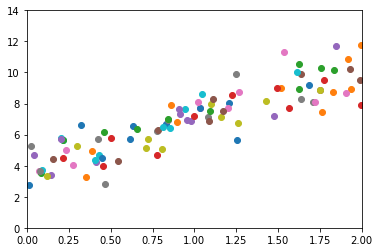

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
[plt.scatter(x,y) for x,y in zip(x,y)]
plt.ylim([0,14])
plt.xlim([0,2])

In [4]:
# We need to add x0=1 to each instance
x_b = np.c_[np.ones((100,1)),x]
# Let's apply the normal equation
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.85549115],
       [3.17514069]])

There we have our answer, and since this is a linear model and not a polynomial one, we only have a theta_0 and theta_1.
Now let's make a prediction.

In [5]:
x_new = np.array([[0],[2]])
# Add in bias
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.85549115],
       [10.20577253]])

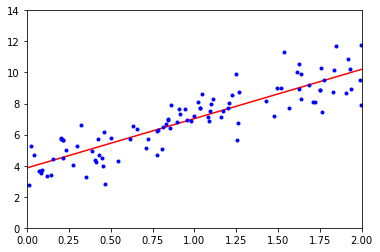

In [7]:
#[plt.scatter(x,y, c='k') for x,y in zip(x,y)]
plt.ylim([0,14])
plt.xlim([0,2])
plt.plot(x_new, y_predict, 'r-')
plt.plot(x,y, 'b.')

In [8]:
# Doing LinearRegression right from sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.85549115]), array([[3.17514069]]))

#### Computational Complexity

The Normal Equation has to compute the inverse of x_transposed \* x. Such a task has a computational complexity of O(n^2.4)~O(n^3). This means that a large number of features or instances will slow this down to a halt quickly.

The solution to this issue is **Gradient Descent**.

### Gradient Descent

"The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function," starting with theta being filled with random values.

Issues like local minimums and plateaus arise in finding the global minimum all the time, but luckily, a linear model has a *convex* cost function.